1\. PCA on 3D dataset

* Generate a dataset simulating 3 features, each with N entries (N being ${\cal O}(1000)$). Each feature is made by random numbers generated according the normal distribution $N(\mu,\sigma)$ with mean $\mu_i$ and standard deviation $\sigma_i$, with $i=1, 2, 3$. Generate the 3 variables $x_{i}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix
* Find the eigenvectors and eigenvalues using the SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained
* Redefine the data according to the new basis from the PCA
* Plot the data, in both the original and the new basis. The figure should have 2 rows (the original and the new basis) and 3 columns (the $[x_0, x_1]$, $[x_0, x_2]$ and $[x_1, x_2]$ projections) of scatter plots.

In [1]:
import numpy as np
from scipy import linalg as la
from matplotlib import pyplot as plt

In [2]:
# Generation of the dataset
N = 1000
x1= np.random.normal(0, 1,N).T
x2 = x1 + np.random.normal(0, 3,N).T
x3 = 2*x1 + x2
dataset = np.array([x1,x2,x3])

#Eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix
cov = np.cov(dataset)
l, V = la.eig(cov)
print ("Eigenvalues : " ,l)
print ("Eigenvectors : \n",V)

#Eigenvectors and eigenvalues using the SVD
print("\n Eigenvectors and eigenvalues using the SVD :")
U, S, Vt = la.svd(cov)
print ("Eigenvalues : " ,S)
print ("Eigenvectors :\n",Vt)

'''There is a small difference between the two procedures'''

Eigenvalues :  [ 2.96069484e+01+0.j -7.84067082e-16+0.j  2.09118599e+00+0.j]
Eigenvectors : 
 [[-0.11911675 -0.81649658  0.56492879]
 [-0.57277689 -0.40824829 -0.71081641]
 [-0.81101038  0.40824829  0.41904116]]

 Eigenvectors and eigenvalues using the SVD :
Eigenvalues :  [2.96069484e+01 2.09118599e+00 1.62215249e-15]
Eigenvectors :
 [[-0.11911675 -0.57277689 -0.81101038]
 [ 0.56492879 -0.71081641  0.41904116]
 [ 0.81649658  0.40824829 -0.40824829]]


'There is a small difference between the two procedures'

In [3]:
#Percent of the total dataset's variability is explained by the principal components
Lambda = np.diag(l)
print("Lambda:\n", Lambda, '\n')
print("Trace(A):\n", cov.trace(), '\n')
print("Trace(Lambda):\n", Lambda.trace(), '\n')
print("Total variability:\n", (Lambda[0,0]/Lambda.trace()), '\n')

#Reduce the dimensionality of the system so that at least 99% of the total variability is retained
dataset_reduced = dataset[0:2,:]
cov_reduced = np.cov(dataset_reduced)
l_r, V_r = la.eig(cov_reduced)
Lambda_r = np.diag(l_r)
print ("Total variability with a reduced dataset:",Lambda_r[0,0]/Lambda_r.trace(), '\n')

Lambda:
 [[ 2.96069484e+01+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j]
 [ 0.00000000e+00+0.j -7.84067082e-16+0.j  0.00000000e+00+0.j]
 [ 0.00000000e+00+0.j  0.00000000e+00+0.j  2.09118599e+00+0.j]] 

Trace(A):
 31.69813442823674 

Trace(Lambda):
 (31.69813442823678+0j) 

Total variability:
 (0.9340281051917655+0j) 

Total variability with a reduced dataset: (0.07975509856528215+0j) 



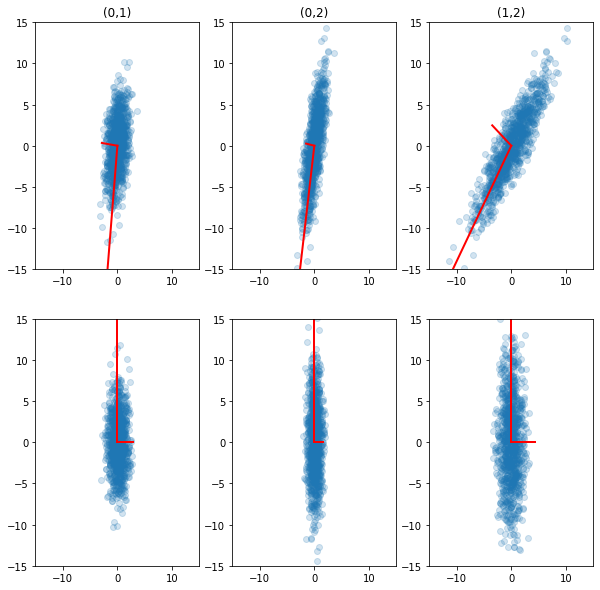

In [4]:
# Redefining the data in the basis yielded by the PCA procedure
l01, V01 = np.linalg.eig(np.dot(dataset[0:2,:], dataset[0:2,:].T)/(N-1))
# rotate all the data points accordingly to the new base
Xp01 = np.dot(V01.T, dataset[0:2,:])


# Redefining the data in the basis yielded by the PCA procedure
l02, V02 = np.linalg.eig(np.dot(dataset[0:3:2,:], dataset[0:3:2,:].T)/(N-1))
# rotate all the data points accordingly to the new base
Xp02 = np.dot(V02.T, dataset[0:3:2,:])

# Redefining the data in the basis yielded by the PCA procedure
l12, V12 = np.linalg.eig(np.dot(dataset[1:3,:], dataset[1:3,:].T)/(N-1))
# rotate all the data points accordingly to the new base
Xp12 = np.dot(V12.T, dataset[1:3,:])


# plot
# a scale factor to emphazise the lines 
scale_factor=3
fig=plt.figure(figsize=(10,10))

#(0,1)
fig.add_subplot(2, 3,1)

plt.scatter(dataset[0,:], dataset[1,:], alpha=0.2)
# draw each eigenvector
for li, vi in zip(l01, V01.T):
    # the line is defined by means of its beginning and its end 
    plt.plot([0, scale_factor*li*vi[0]], [0, scale_factor*li*vi[1]] ,'r-', lw=2)

# fix the size of the axes to have the right visual effect
plt.axis([-15,15,-15,15])
plt.title('(0,1)');

# (0,2)
fig.add_subplot(2, 3,2)

plt.scatter(dataset[0,:], dataset[2,:], alpha=0.2)

# draw each eigenvector
for li, vi in zip(l02, V02.T):
    # the line is defined by means of its beginning and its end 
    plt.plot([0, scale_factor*li*vi[0]], [0, scale_factor*li*vi[1]], 'r-', lw=2)

# fix the size of the axes to have the right visual effect
plt.axis([-15,15,-15,15])
plt.title('(0,2)');


# (1,2)
fig.add_subplot(2, 3,3)

plt.scatter(dataset[1,:], dataset[2,:], alpha=0.2)

# draw each eigenvector
for li, vi in zip(l12, V12.T):
    # the line is defined by means of its beginning and its end 
    plt.plot([0, scale_factor*li*vi[0]], [0, scale_factor*li*vi[1]], 'r-', lw=2)

# fix the size of the axes to have the right visual effect
plt.axis([-15,15,-15,15])
plt.title('(1,2)');


# then plot the rotated dataset and its "axes"
# (0,1)
fig.add_subplot(2, 3,4)
plt.scatter(Xp01[0,:], Xp01[1,:], alpha=0.2)
# same eigenvalues as before, assume we rotated properly the data
for li, vi in zip(l01,  np.diag([1]*2)):
    plt.plot([0, scale_factor*li*vi[0]], [0, scale_factor*li*vi[1]], 'r-', lw=2)
plt.axis([-15,15,-15,15]);

#(0,2)
fig.add_subplot(2, 3,5)
plt.scatter(Xp02[0,:], Xp02[1,:], alpha=0.2)
# same eigenvalues as before, assume we rotated properly the data
for li, vi in zip(l02,  np.diag([1]*2)):
    plt.plot([0, scale_factor*li*vi[0]], [0, scale_factor*li*vi[1]], 'r-', lw=2)
plt.axis([-15,15,-15,15]);

#(1,2)
fig.add_subplot(2, 3,6)
plt.scatter(Xp12[0,:], Xp12[1,:], alpha=0.2)
# same eigenvalues as before, assume we rotated properly the data
for li, vi in zip(l12,  np.diag([1]*2)):
    plt.plot([0, scale_factor*li*vi[0]], [0, scale_factor*li*vi[1]], 'r-', lw=2)
plt.axis([-15,15,-15,15])

2\. PCA on a nD dataset

* Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normally distributed, with a standard deviation much smaller (e.g. a factor 20) than those used to generate the $x_1$ and $x_2$. Repeat the PCA procedure and compare the results with what you have obtained before.

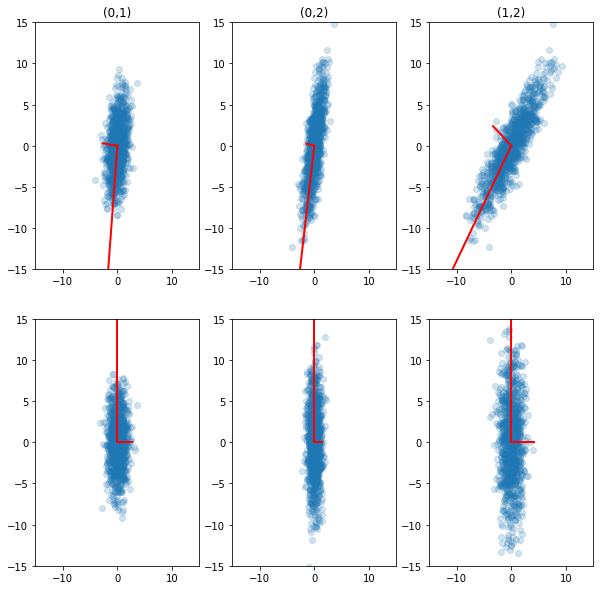

In [10]:
new_var= [np.random.normal(0, 1/20, 1000) for i in range(0,10)]
x0 = np.random.normal(0, 1, 1000)
x1 = x0 + np.random.normal(0, 3, 1000)
x2 = 2*x0 + x1
dataset_n = np.array([*(x0,x1,x2),*new_var])

# Redefining the data in the basis yielded by the PCA procedure
l01, V01 = np.linalg.eig(np.dot(dataset_n[0:2,:], dataset_n[0:2,:].T)/(N-1))
# rotate all the data points accordingly to the new base
Xp01 = np.dot(V01.T, dataset_n[0:2,:])


# Redefining the data in the basis yielded by the PCA procedure
l02, V02 = np.linalg.eig(np.dot(dataset_n[0:3:2,:], dataset_n[0:3:2,:].T)/(N-1))
# rotate all the data points accordingly to the new base
Xp02 = np.dot(V02.T, dataset_n[0:3:2,:])

# Redefining the data in the basis yielded by the PCA procedure
l12, V12 = np.linalg.eig(np.dot(dataset_n[1:3,:], dataset_n[1:3,:].T)/(N-1))
# rotate all the data points accordingly to the new base
Xp12 = np.dot(V12.T, dataset_n[1:3,:])


# plot
# a scale factor to emphazise the lines 
scale_factor=3
fig=plt.figure(figsize=(10,10))

#(0,1)
fig.add_subplot(2, 3,1)

plt.scatter(dataset_n[0,:], dataset_n[1,:], alpha=0.2)
# draw each eigenvector
for li, vi in zip(l01, V01.T):
    # the line is defined by means of its beginning and its end 
    plt.plot([0, scale_factor*li*vi[0]], [0, scale_factor*li*vi[1]] ,'r-', lw=2)

# fix the size of the axes to have the right visual effect
plt.axis([-15,15,-15,15])
plt.title('(0,1)');

# (0,2)
fig.add_subplot(2, 3,2)

plt.scatter(dataset_n[0,:], dataset_n[2,:], alpha=0.2)

# draw each eigenvector
for li, vi in zip(l02, V02.T):
    # the line is defined by means of its beginning and its end 
    plt.plot([0, scale_factor*li*vi[0]], [0, scale_factor*li*vi[1]], 'r-', lw=2)

# fix the size of the axes to have the right visual effect
plt.axis([-15,15,-15,15])
plt.title('(0,2)');


# (1,2)
fig.add_subplot(2, 3,3)

plt.scatter(dataset_n[1,:], dataset_n[2,:], alpha=0.2)

# draw each eigenvector
for li, vi in zip(l12, V12.T):
    # the line is defined by means of its beginning and its end 
    plt.plot([0, scale_factor*li*vi[0]], [0, scale_factor*li*vi[1]], 'r-', lw=2)

# fix the size of the axes to have the right visual effect
plt.axis([-15,15,-15,15])
plt.title('(1,2)');


# then plot the rotated dataset and its "axes"
# (0,1)
fig.add_subplot(2, 3,4)
plt.scatter(Xp01[0,:], Xp01[1,:], alpha=0.2)
# same eigenvalues as before, assume we rotated properly the data
for li, vi in zip(l01,  np.diag([1]*2)):
    plt.plot([0, scale_factor*li*vi[0]], [0, scale_factor*li*vi[1]], 'r-', lw=2)
plt.axis([-15,15,-15,15]);

#(0,2)
fig.add_subplot(2, 3,5)
plt.scatter(Xp02[0,:], Xp02[1,:], alpha=0.2)
# same eigenvalues as before, assume we rotated properly the data
for li, vi in zip(l02,  np.diag([1]*2)):
    plt.plot([0, scale_factor*li*vi[0]], [0, scale_factor*li*vi[1]], 'r-', lw=2)
plt.axis([-15,15,-15,15]);

#(1,2)
fig.add_subplot(2, 3,6)
plt.scatter(Xp12[0,:], Xp12[1,:], alpha=0.2)
# same eigenvalues as before, assume we rotated properly the data
for li, vi in zip(l12,  np.diag([1]*2)):
    plt.plot([0, scale_factor*li*vi[0]], [0, scale_factor*li*vi[1]], 'r-', lw=2)
plt.axis([-15,15,-15,15]);

3\. **Optional**: PCA on the MAGIC dataset

Perform a PCA on the magic04.data dataset.

In [ ]:
# get the dataset and its description on the proper data directory
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P data/
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P data/ 